In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from fancyimpute import KNN 
import os
from sklearn.metrics import r2_score
from scipy import stats
%matplotlib inline

C:\Users\deekshitha.r\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


In [2]:
# check Working directory
os.getcwd()

'C:\\Users\\deekshitha.r'

In [3]:
# Load data
df = pd.read_excel("Absenteeism_at_work_Project.xls")

# Exploratory data analysis

In [4]:
# Top 5 rows of data
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [5]:
# data types of the given variables
df.dtypes

ID                                   int64
Reason for absence                 float64
Month of absence                   float64
Day of the week                      int64
Seasons                              int64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure               float64
Education                          float64
Son                                float64
Social drinker                     float64
Social smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

In [6]:
# No. of unique values present in varuables
df.nunique()

ID                                 36
Reason for absence                 28
Month of absence                   13
Day of the week                     5
Seasons                             4
Transportation expense             24
Distance from Residence to Work    25
Service time                       18
Age                                22
Work load Average/day              38
Hit target                         13
Disciplinary failure                2
Education                           4
Son                                 5
Social drinker                      2
Social smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body mass index                    17
Absenteeism time in hours          19
dtype: int64

In [7]:
# Shape of our data
df.shape

(740, 21)

In [8]:
# From the problem statement, our file has been categorising the variables in two category " Continuos" and "Categorical"
continuous_variables = ['Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Transportation expense',
       'Hit target', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']

categorical_variables = ['ID','Reason for absence','Month of absence','Day of the week',
                     'Seasons','Disciplinary failure', 'Education', 'Social drinker',
                     'Social smoker', 'Pet', 'Son']

# Missing Value Analysis

In [9]:
# Let's create a dataframe with missing values present in each variable
missing_val = pd.DataFrame(df.isnull().sum()).reset_index()

# Let's rename variables of missing_val dataframe
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

# Let's calculate the percentage missing value
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(df))*100

# Let's sort the missing_val in Descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

# Let's save output result into csv file
missing_val.to_csv("Missing_perc.csv", index = False)

## Imputational Methods

In [10]:
# Let's Drop the observation in which "Absenteeism time in hours" has missing value
df = df.drop(df[df['Absenteeism time in hours'].isnull()].index, axis=0)
print(df.shape)
print(df['Absenteeism time in hours'].isnull().sum())

(718, 21)
0


In [11]:
#Apply KNN imputation algorithm
df = pd.DataFrame(KNN(k = 3).fit_transform(df), columns = df.columns)

Imputing row 1/718 with 0 missing, elapsed time: 0.686
Imputing row 101/718 with 1 missing, elapsed time: 0.718
Imputing row 201/718 with 0 missing, elapsed time: 0.733
Imputing row 301/718 with 0 missing, elapsed time: 0.733
Imputing row 401/718 with 0 missing, elapsed time: 0.733
Imputing row 501/718 with 1 missing, elapsed time: 0.733
Imputing row 601/718 with 0 missing, elapsed time: 0.733
Imputing row 701/718 with 0 missing, elapsed time: 0.733


# Outlier Analysis

Text(0, 0.5, 'Values')

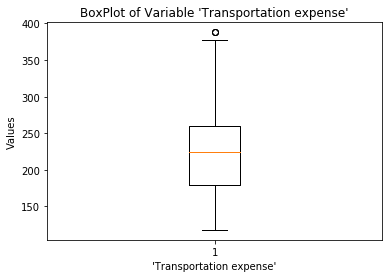

In [12]:
# Let us Plot BoxPlot # continuous variables
%matplotlib inline
plt.boxplot(df['Transportation expense'])
plt.xlabel("'Transportation expense'")
plt.title("BoxPlot of Variable 'Transportation expense'")
plt.ylabel('Values')

Text(0, 0.5, 'Values')

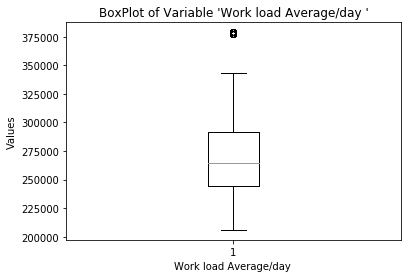

In [13]:
# Let us plot work load Average per day
plt.boxplot(df['Work load Average/day '])
plt.xlabel("Work load Average/day ")
plt.title("BoxPlot of Variable 'Work load Average/day '")
plt.ylabel('Values')

Text(0, 0.5, 'Values')

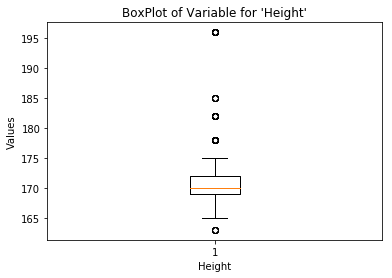

In [14]:
# Let us plot Height
plt.boxplot(df['Height'])
plt.xlabel("Height")
plt.title("BoxPlot of Variable for 'Height'")
plt.ylabel('Values')

Text(0, 0.5, 'Values')

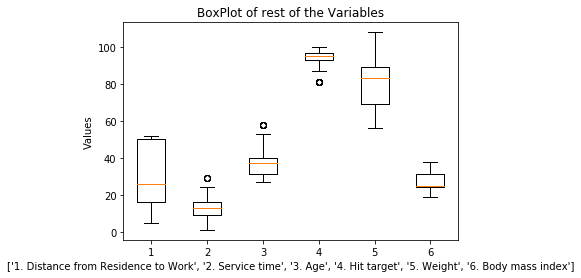

In [15]:
#calculate remaining ones
plt.boxplot([ df['Distance from Residence to Work'], df['Service time'], df['Age'], df['Hit target'], df['Weight'], df['Body mass index']])
plt.xlabel(['1. Distance from Residence to Work', '2. Service time', '3. Age', '4. Hit target', '5. Weight', '6. Body mass index'])
plt.title("BoxPlot of rest of the Variables")
plt.ylabel('Values')

In [16]:
# From the above mentioned boxplot, we can clearly see that in variables 'Distance from Residence to Work', 'Weight' and 'Body mass index'
## so, there is no outlier
### see the attached graph of output

In [17]:
# Let us now list variables which doesn't have outlier
neglect = ['Distance from Residence to Work', 'Weight', 'Body mass index']

#Let us now use the loops
## Looping over all continuou variables to detect and remove Outliers
for i in continuous_variables:
## Avoiding the variables which doesn't have outlier
    if i in neglect:
        continue
# Getting 75 and 25 percentile of variable "i"
    q75, q25 = np.percentile(df[i], [75,25])
# Calculating Interquartile range
    iqr = q75 - q25
    
# Calculating upper extream and lower extream
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    
# Replacing all the outliers value to NA
    df.loc[df[i]< minimum,i] = np.nan
    df.loc[df[i]> maximum,i] = np.nan

In [18]:
# Now let us again impute missing values with KNN
df = pd.DataFrame(KNN(k = 3).fit_transform(df), columns = df.columns)
# Checking if there is any missing value
df.isnull().sum().sum()

Imputing row 1/718 with 0 missing, elapsed time: 0.415
Imputing row 101/718 with 0 missing, elapsed time: 0.415
Imputing row 201/718 with 1 missing, elapsed time: 0.415
Imputing row 301/718 with 0 missing, elapsed time: 0.418
Imputing row 401/718 with 0 missing, elapsed time: 0.418
Imputing row 501/718 with 0 missing, elapsed time: 0.418
Imputing row 601/718 with 2 missing, elapsed time: 0.418
Imputing row 701/718 with 0 missing, elapsed time: 0.418


0

# Feature Slection

In [19]:
## Let us now see the Correlation analysis for continuous variables
#Correlation plot
df_corr = df.loc[:,continuous_variables]

[]

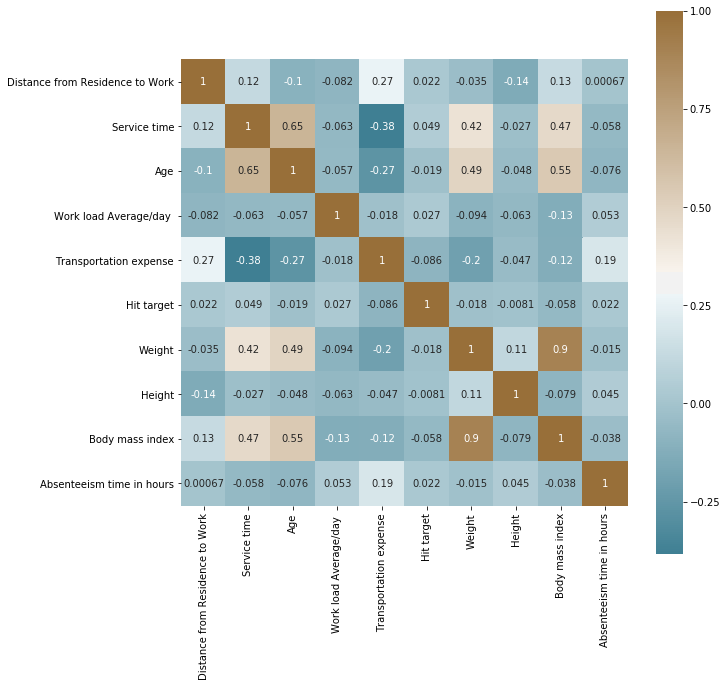

In [20]:
# Let us now set the width and hieght of the plot
f, ax = plt.subplots(figsize=(10, 10))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 50, as_cmap=True),
            square=True, ax=ax, annot = True)
plt.plot()

In [21]:
# Let us loop for ANOVA test - Since the target variable is continuous
for i in categorical_variables:
    f, p = stats.f_oneway(df[i], df["Absenteeism time in hours"])
    print("P value for variable "+str(i)+" is "+str(p))

P value for variable ID is 8.449881295013552e-167
P value for variable Reason for absence is 9.770767089088417e-277
P value for variable Month of absence is 3.3124782278857673e-25
P value for variable Day of the week is 0.0008188161594849071
P value for variable Seasons is 3.127506937786291e-40
P value for variable Disciplinary failure is 1.2189432024253421e-185
P value for variable Education is 8.375003325123203e-105
P value for variable Social drinker is 1.2794395762714786e-150
P value for variable Social smoker is 9.117849965003895e-184
P value for variable Pet is 5.325984030592952e-127
P value for variable Son is 9.45269711512623e-116


In [22]:
# Let us drop the variables which has redundant information
to_drop = ['Weight']
df = df.drop(to_drop, axis = 1)

In [23]:
# Let us put the Continuous Variables and Categorical Variables after droping variables
continuous_variables = [i for i in continuous_variables if i not in to_drop]
categorical_variables = [i for i in categorical_variables if i not in to_drop]

In [24]:
# For the cleaning of data let us just make a copy
clean_data = df.copy()

# Feature Scaling

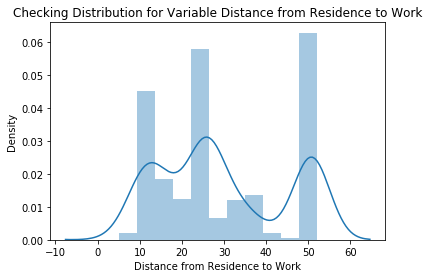

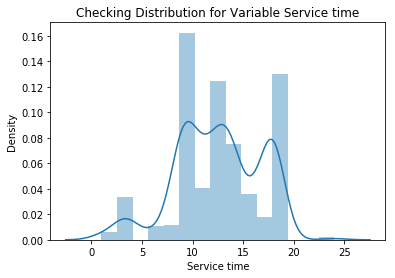

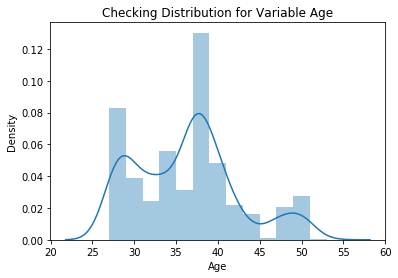

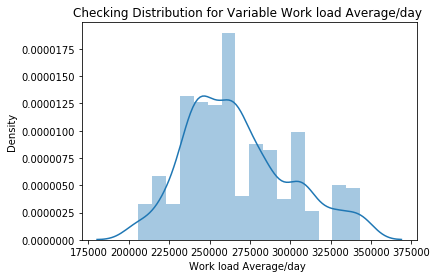

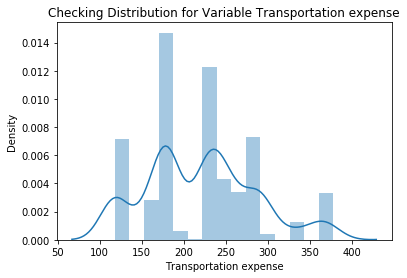

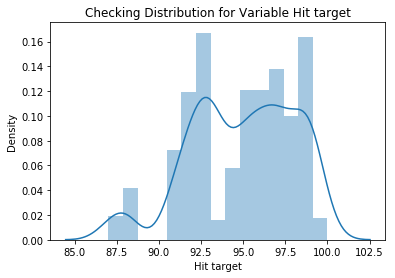

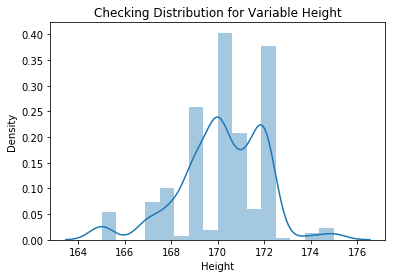

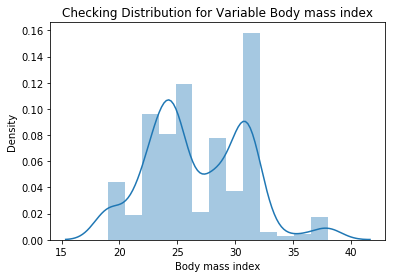

In [25]:
# Let us now check if there is any normally distributed variable in data
for i in continuous_variables:
    if i == 'Absenteeism time in hours':
        continue
    sns.distplot(df[i],bins = 'auto')
    plt.title("Checking Distribution for Variable "+str(i))
    plt.ylabel("Density")
    plt.show()

In [26]:
# Let us now check if there is any normally distributed variable in data
# Since we will not find the normally distributed curve for this dataset, we will use Normalizationg for Feature Scalling
##Normalization
for i in continuous_variables:
    if i == 'Absenteeism time in hours':
        continue
    df[i] = (df[i] - df[i].min())/(df[i].max()-df[i].min())

# Machine Learning

In [27]:
# Will get the dummy variables for categorical variables
df = pd.get_dummies(data = df, columns = categorical_variables)

## Copying the dataframe
df1 = df.copy()

In [28]:
# Will see the data
df.iloc[:,8].head()

0    4.0
1    0.0
2    2.0
3    4.0
4    2.0
Name: Absenteeism time in hours, dtype: float64

In [29]:
# Will see the 1st row of data
df.iloc[:, df.columns != 'Absenteeism time in hours'].head(1)

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Height,Body mass index,ID_1.0,ID_2.0,...,Pet_5.0,Pet_8.0,Son_0.0,Son_1.0,Son_1.0000000034808583,Son_2.0,Son_2.000000090044646,Son_3.0,Son_3.9575535615568516,Son_4.0
0,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,0.7,0.578947,0,0,...,0,0,0,0,0,1,0,0,0,0


In [30]:
# Now coming to train_test. Using train_test_split sampling function for test and train data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( df.iloc[:, df.columns != 'Absenteeism time in hours'], df.iloc[:, 8], test_size = 0.20)

# ## Decision Tree

In [31]:
# Let us now Import libraries for Decision Tree 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Now will build model on top of training dataset
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

# Will calculate RMSE for training data to check for over fitting
pred_train = fit_DT.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Will Calculate RMSE for test data to check accuracy
pred_test = fit_DT.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

Root Mean Squared Error For Training data = 3.2176019064301475
Root Mean Squared Error For Test data = 2.7729740336563355
R^2 Score(coefficient of determination) = 0.09092210008781376


## Random Forest

In [32]:
# Let us Import libraries for Random Forest
from sklearn.ensemble import RandomForestRegressor

# Building model on top of training dataset
fit_RF = RandomForestRegressor(n_estimators = 500).fit(X_train,y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_RF.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_RF.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

Root Mean Squared Error For Training data = 1.0653110862008006
Root Mean Squared Error For Test data = 2.4073953246791784
R^2 Score(coefficient of determination) = 0.31482056451169194


## Linear Regression

In [33]:
# Let us import libraries for Linear Regression
from sklearn.linear_model import LinearRegression

# Building model on top of training dataset
fit_LR = LinearRegression().fit(X_train , y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_LR.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_LR.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

Root Mean Squared Error For Training data = 2.5299306376856294
Root Mean Squared Error For Test data = 6959851965569.164
R^2 Score(coefficient of determination) = -5.726766807009819e+24
